<a href="https://colab.research.google.com/github/weihan444/ML-Hackathon/blob/PW-testing/ML_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries

In [29]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Preprocessing

In [8]:
data_url = "https://raw.githubusercontent.com/weihan444/ML-Hackathon/main/ML%20Dataset.csv"
data = pd.read_csv(data_url, header=0)

data.head(5)

,Code,Age_Numerical,Gender,Marital,Marital_problems,Religion_binary,Religion_help,Med_or_not,Expenses,Monthly_expenses,...,DASS_stress_numerical,MSPSS_family,MSPSS_friends,MSPSS_significant_others,DASS_depression_binary,DASS_depression_severity,DASS_anxiety_binary,DASS_anxiety_severity,DASS_stress_binary,DASS_stress_severity
0,1,34,0,0,0,1,1,1,2,1,...,0,27.2,24.0,26.0,0,0,0,0,0,0
1,2,32,1,0,0,1,1,1,1,0,...,2,28.0,28.0,28.0,0,0,0,0,0,0
2,3,33,0,0,0,1,1,1,1,0,...,0,28.0,28.0,28.0,0,0,0,0,0,0
3,4,33,1,0,1,1,1,1,2,1,...,18,25.2,21.2,24.0,1,2,1,4,1,1
4,5,39,1,0,0,1,1,1,2,1,...,2,26.0,20.0,28.0,0,0,0,0,0,0


# Feature Engineering
Selecting data


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


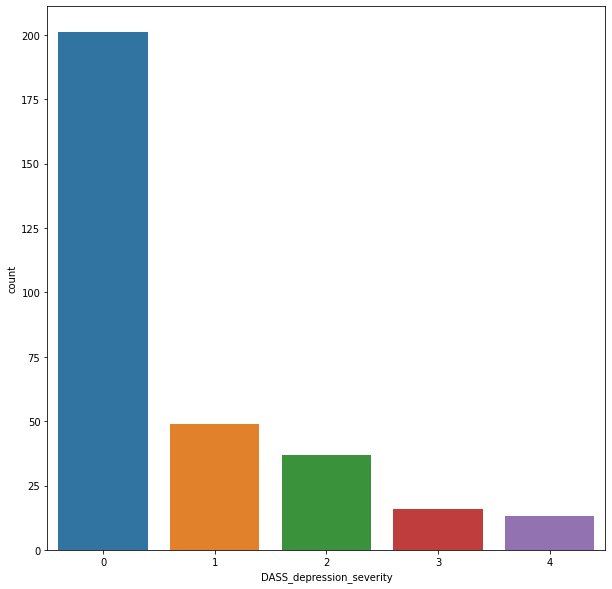

In [30]:
selected_data = data[["Age_Numerical", "Gender", "Routine_loss", "Class_hours", "Medical_illness", "Mental_illness", "COVID_symptoms", "Quarantine", "DASS_depression_severity"]]

selected_data.head(5)

X = selected_data.drop(['DASS_depression_severity'], axis=1)
y = selected_data['DASS_depression_severity']

plt.figure(figsize=(10,10))
sns.countplot(y)
plt.show()

# Split y into multi-class array
# y = keras.utils.to_categorical(y)

So we can see the data is highly imbalanced, we should perform oversampling

Split into train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

# Feature Scaling
Standardize Data

In [10]:
stand = StandardScaler().fit(X_train)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)





# Model Training


In [18]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train_stand, y_train,
    validation_split=0.2,
    epochs=6)
model.evaluate(X_test_stand, y_test)

Epoch 1/6
6/6 [==============================] - 1s 34ms/step - loss: 1.6576 - accuracy: 0.1958 - val_loss: 1.5218 - val_accuracy: 0.4583
Epoch 2/6
6/6 [==============================] - 0s 7ms/step - loss: 1.5711 - accuracy: 0.2963 - val_loss: 1.4603 - val_accuracy: 0.4583
Epoch 3/6
6/6 [==============================] - 0s 7ms/step - loss: 1.4957 - accuracy: 0.3862 - val_loss: 1.4056 - val_accuracy: 0.5833
Epoch 4/6
6/6 [==============================] - 0s 8ms/step - loss: 1.4268 - accuracy: 0.4762 - val_loss: 1.3566 - val_accuracy: 0.6042
Epoch 5/6
6/6 [==============================] - 0s 10ms/step - loss: 1.3684 - accuracy: 0.5556 - val_loss: 1.3148 - val_accuracy: 0.5833
Epoch 6/6
3/3 [==============================] - 0s 5ms/step - loss: 1.2683 - accuracy: 0.6456


[1.2683082818984985, 0.6455696225166321]

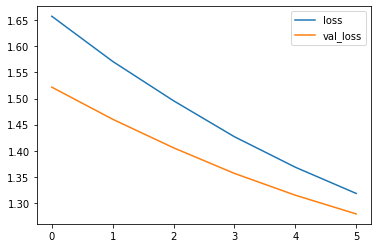

In [22]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:,['loss','val_loss']].plot()